In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.spatial.distance import correlation

In [45]:
train = pd.read_csv('train.csv')
train.head()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 看是否跟家人在一起

In [10]:
train['WithFamily'] =  train["Parch"] + train["SibSp"]
train['WithFamily'].loc[train['WithFamily'] > 1] = 1
train['WithFamily'].loc[train['WithFamily'] == 0] = 0

train.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WithFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
x = train.WithFamily
y = train.Survived

# return Pearson's correlation coefficient, 2-tailed p-value) 
pearsonr(x,y)

(0.20336708569989187, 9.0094901793259291e-10)

In [15]:
trainx = train['WithFamily']
trainy = train['Survived']

x = trainx.as_matrix()
y = trainy.as_matrix()

correlation(x,y)

0.79663291430010819

withfamily这个新变量的表现不太好，就先放着吧

# 对fare变量进行处理

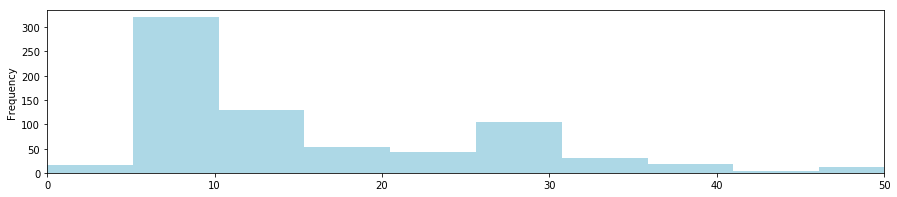

In [32]:
fare_not_survived = train["Fare"][train["Survived"] == 0]
fare_survived = train["Fare"][train["Survived"] == 1]
train['Fare'].plot(kind='hist', figsize=(15,3), bins=100, xlim=(0,50), color='lightblue')
plt.show()

In [33]:
x = train.Fare
y = train.Survived

# return Pearson's correlation coefficient, 2-tailed p-value) 
pearsonr(x,y)

(0.25730652238496243, 6.1201893419218733e-15)

In [35]:
trainx = train['Fare']
trainy = train['Survived']

x = trainx.as_matrix()
y = trainy.as_matrix()

correlation(x,y)

0.74269347761503757

## Bining

In [111]:
train['Fare_bin'] = pd.qcut(train['Fare'], 6, labels = ['1','2','3','4','5','6'])

train = train.astype(dtype = {"Fare_bin":"int64"})

In [112]:
x = train.Fare_bin
y = train.Survived

# return Pearson's correlation coefficient, 2-tailed p-value) 
pearsonr(x,y)

(0.32562597064399101, 1.8758126715508619e-23)

In [109]:
trainx = train['Fare_bin']
trainy = train['Survived']

x = trainx.as_matrix()
y = trainy.as_matrix()

correlation(x,y)

0.70064317501910134

这样子看的话fare处理完之后比处理之前好一点

## Slicing

In [132]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
train['Fare_scaled'] = scaler.fit_transform(train[['Fare']])

In [133]:
x = train.Fare_scaled
y = train.Survived

# return Pearson's correlation coefficient, 2-tailed p-value) 
pearsonr(x,y)

(0.25730652238496243, 6.1201893419218733e-15)

In [134]:
trainx = train['Fare_scaled']
trainy = train['Survived']

x = trainx.as_matrix()
y = trainy.as_matrix()

correlation(x,y)

0.74269347761503757

Slicing之后两个相关系数的值都跟之前一样没有变化，很奇怪，不知道最后用来跑预测效果怎么样